In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#here we load library 

In [125]:
## loading the data
data=pd.read_csv('ec2_cpu_utilization_ac20cd.csv')

In [127]:
data

,timestamp,value
0,2014-04-02 14:29:00,42.652
1,2014-04-02 14:34:00,41.362
2,2014-04-02 14:39:00,43.408
3,2014-04-02 14:44:00,40.262
4,2014-04-02 14:49:00,40.328
...,...,...
4027,2014-04-16 14:29:00,99.434
4028,2014-04-16 14:34:00,99.132
4029,2014-04-16 14:39:00,99.248
4030,2014-04-16 14:44:00,98.552


## Basic Check

In [130]:
data.head()#first five rows

,timestamp,value
0,2014-04-02 14:29:00,42.652
1,2014-04-02 14:34:00,41.362
2,2014-04-02 14:39:00,43.408
3,2014-04-02 14:44:00,40.262
4,2014-04-02 14:49:00,40.328


In [132]:
data.tail()#last 5 rows

,timestamp,value
4027,2014-04-16 14:29:00,99.434
4028,2014-04-16 14:34:00,99.132
4029,2014-04-16 14:39:00,99.248
4030,2014-04-16 14:44:00,98.552
4031,2014-04-16 14:49:00,99.222


In [134]:
data.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [136]:
data=pd.read_csv('ec2_cpu_utilization_ac20cd.csv',parse_dates=[0],index_col='timestamp')

In [138]:
data.head()#first five rows

,value
timestamp,
2014-04-02 14:29:00,42.652
2014-04-02 14:34:00,41.362
2014-04-02 14:39:00,43.408
2014-04-02 14:44:00,40.262
2014-04-02 14:49:00,40.328


In [140]:
data.rename(columns = {'#value': 'value'}, inplace = True)

In [142]:
data['value']

timestamp
2014-04-02 14:29:00    42.652
2014-04-02 14:34:00    41.362
2014-04-02 14:39:00    43.408
2014-04-02 14:44:00    40.262
2014-04-02 14:49:00    40.328
                        ...  
2014-04-16 14:29:00    99.434
2014-04-16 14:34:00    99.132
2014-04-16 14:39:00    99.248
2014-04-16 14:44:00    98.552
2014-04-16 14:49:00    99.222
Name: value, Length: 4032, dtype: float64

In [144]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc. 

,value
count,4032.000000
mean,40.985085
std,21.921157
min,2.464000
25%,33.146000
50%,34.662000
75%,37.633000
max,99.742000


## EDA

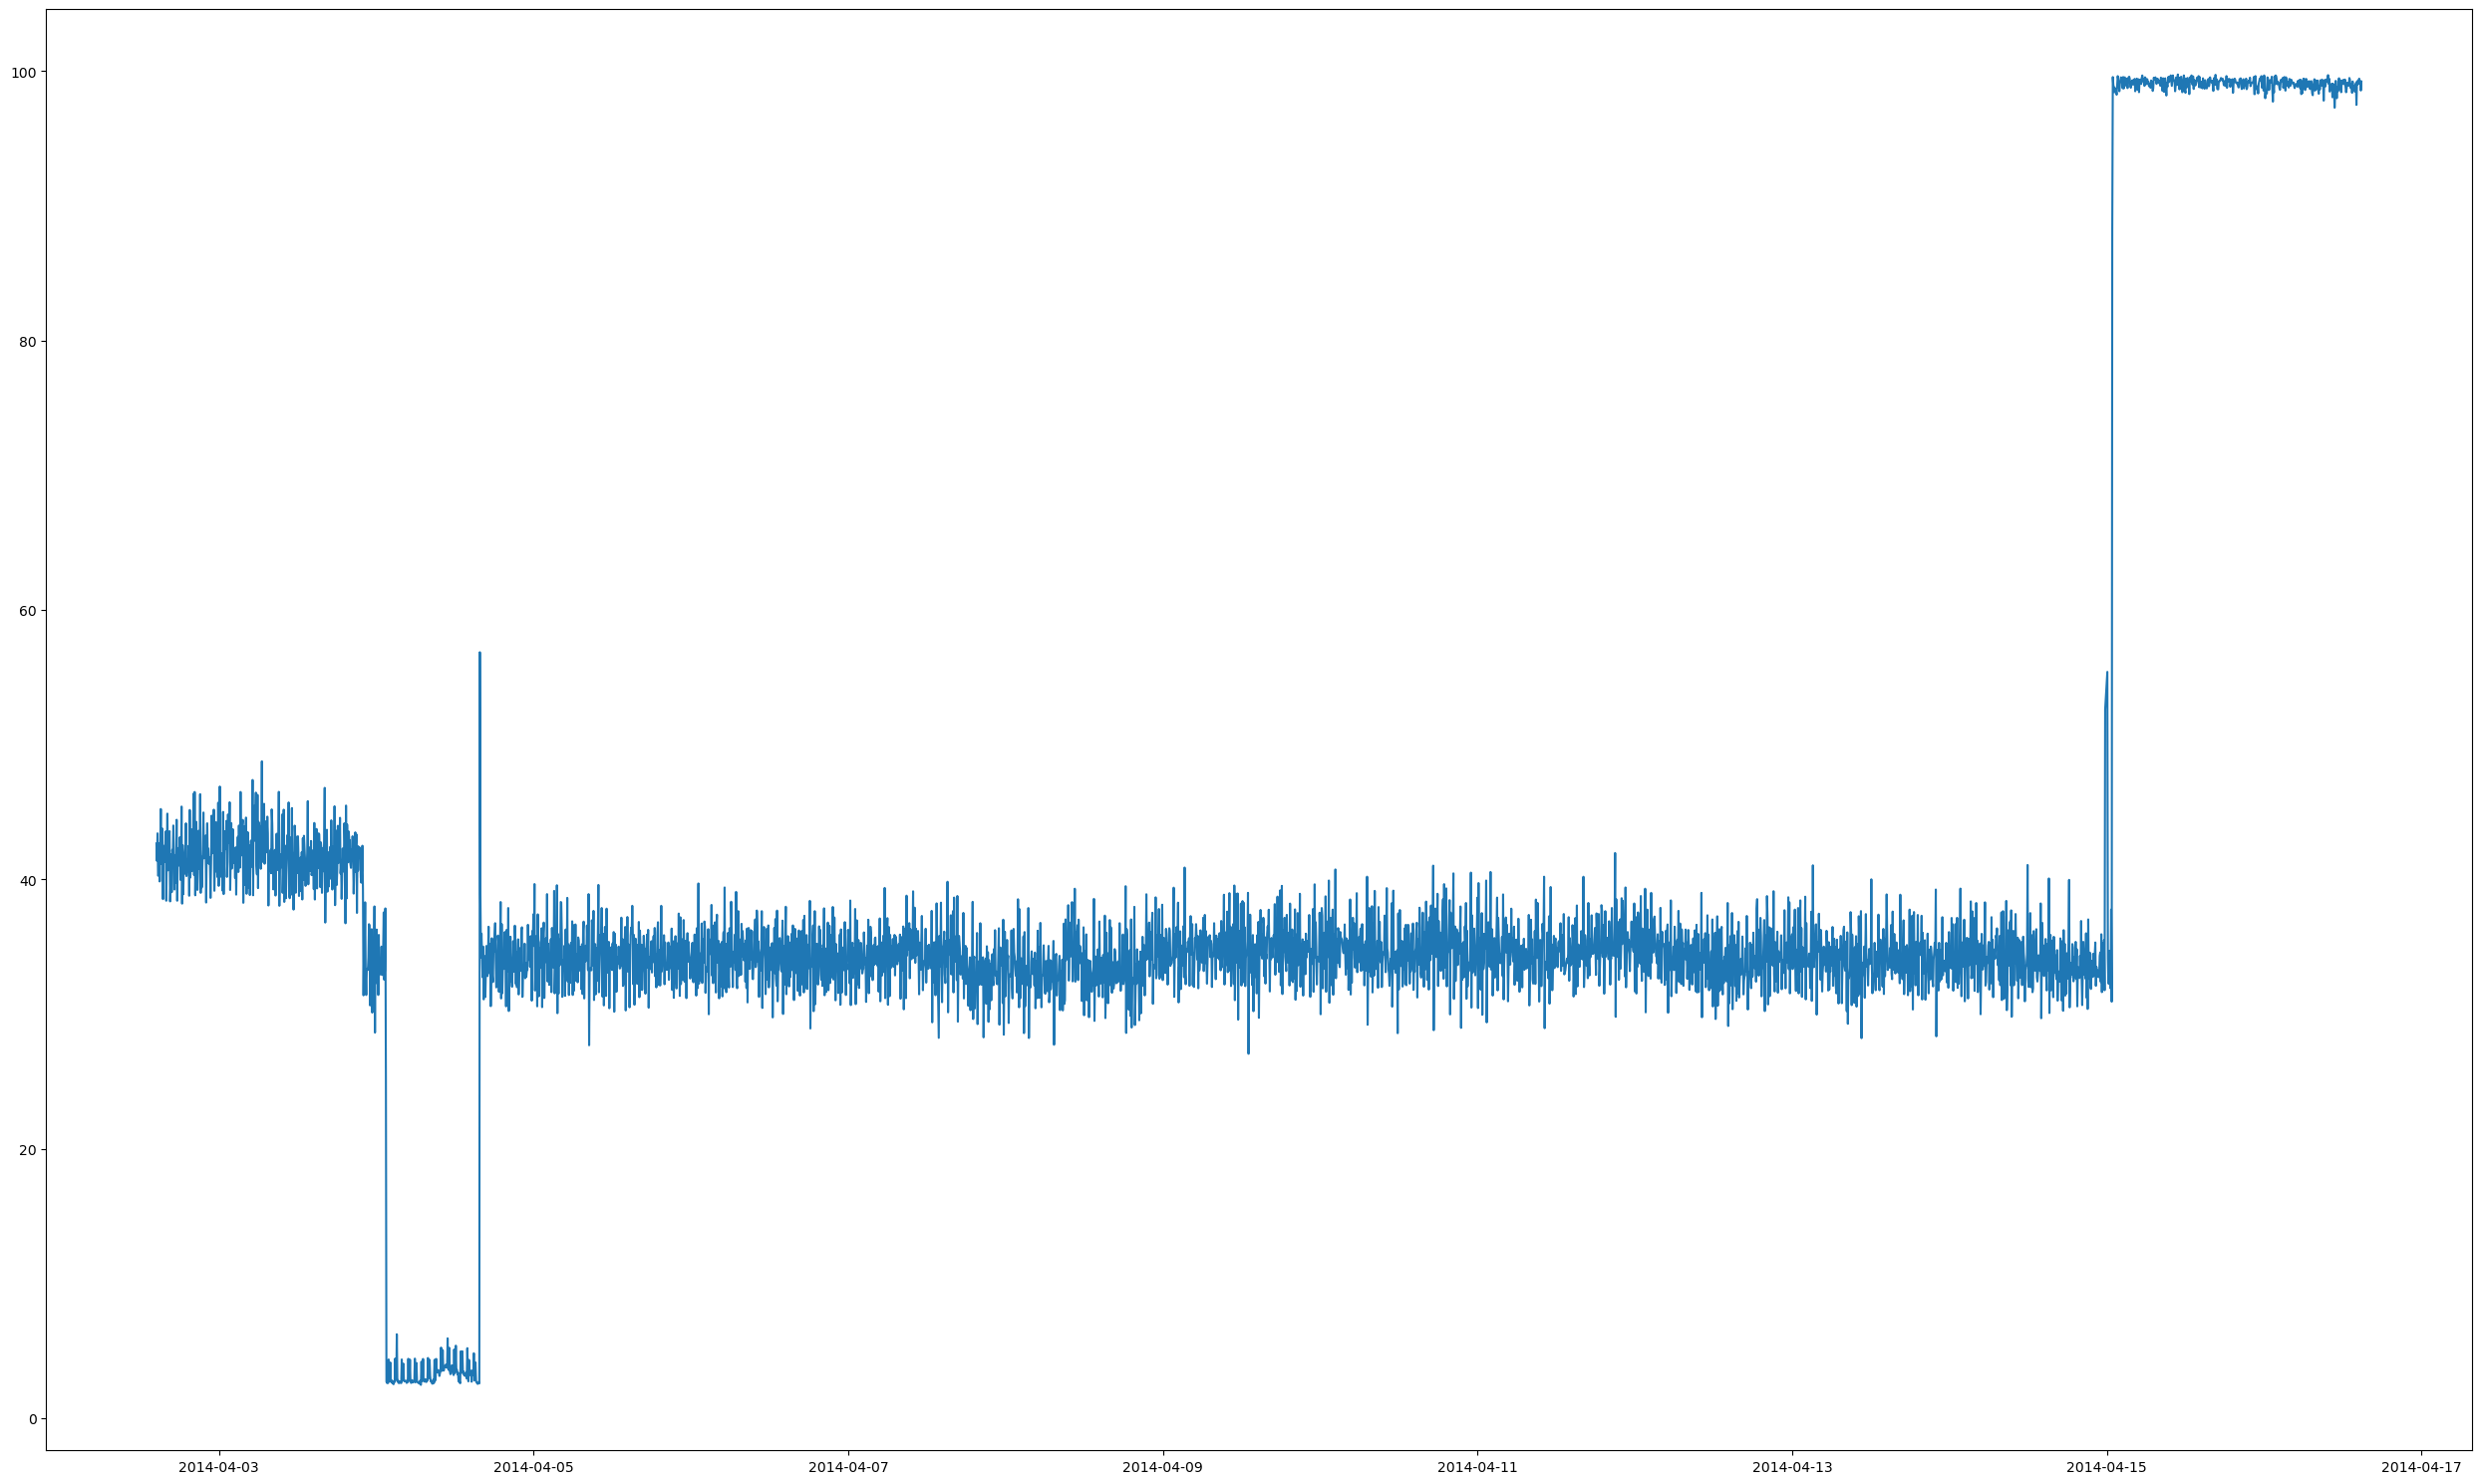

In [147]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(data)#line plot 
plt.tight_layout()

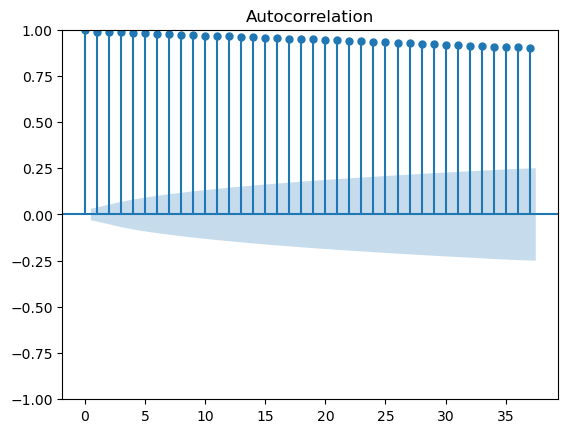

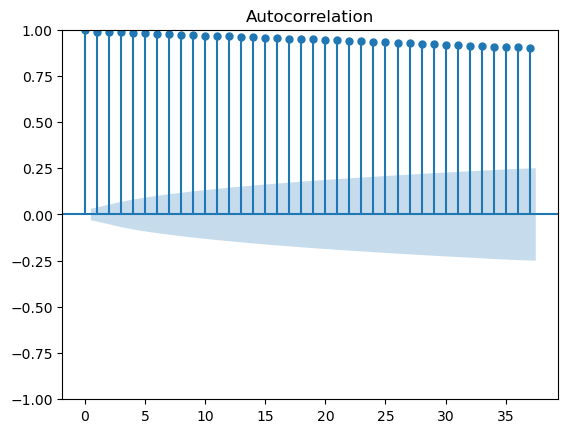

In [149]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [151]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():print("\t",key, ": ", val)

1. ADF :  -0.8536453954549942
2. P-Value :  0.8028543196998864
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 4007
5. Critical Values :
	 1% :  -3.4319830157514812
	 5% :  -2.86226157702636
	 10% :  -2.56715410307542


In [39]:
data

,value
timestamp,
2014-04-02 14:29:00,42.652
2014-04-02 14:34:00,41.362
2014-04-02 14:39:00,43.408
2014-04-02 14:44:00,40.262
2014-04-02 14:49:00,40.328
...,...
2014-04-16 14:29:00,99.434
2014-04-16 14:34:00,99.132
2014-04-16 14:39:00,99.248


In [43]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [45]:
data1 # Series integrated to the order of 1

,value
timestamp,
2014-04-02 14:29:00,NaN
2014-04-02 14:34:00,-1.290
2014-04-02 14:39:00,2.046
2014-04-02 14:44:00,-3.146
2014-04-02 14:49:00,0.066
...,...
2014-04-16 14:29:00,0.372
2014-04-16 14:34:00,-0.302
2014-04-16 14:39:00,0.116


In [47]:
data1=data1.iloc[1:] #null value discarded
data1

,value
timestamp,
2014-04-02 14:34:00,-1.290
2014-04-02 14:39:00,2.046
2014-04-02 14:44:00,-3.146
2014-04-02 14:49:00,0.066
2014-04-02 14:54:00,2.324
...,...
2014-04-16 14:29:00,0.372
2014-04-16 14:34:00,-0.302
2014-04-16 14:39:00,0.116


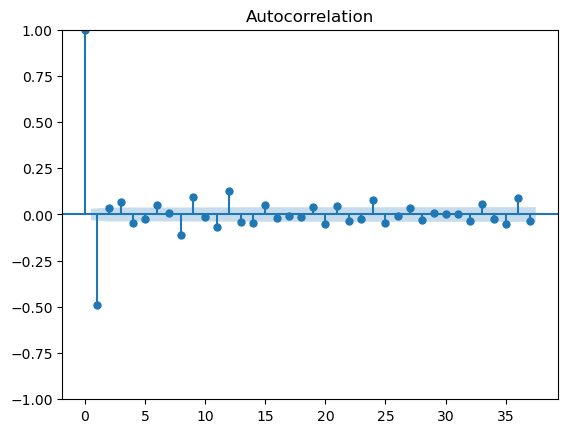

In [49]:
plot_acf(data1); # autocorrelation plot 

In [51]:
data2=data1.diff(periods=1) # differencing applied to data1

In [53]:
data2=data2.iloc[1:] # integrated to the order of 2

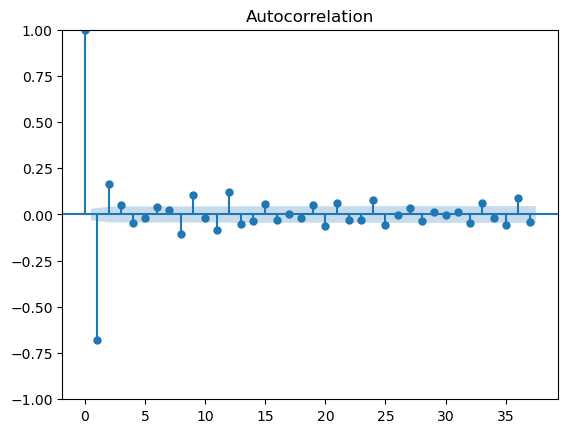

In [55]:
plot_acf(data2);

In [57]:
data2.shape#shape of the data rows and columns

(4030, 1)

In [59]:
## Creating training and test sets
train=data2[:100] #from 0th row to 99th row - traning data
test=data2[100:] #from 100th row to end - testing data

In [61]:
test.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3930 entries, 2014-04-02 22:59:00 to 2014-04-16 14:49:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   3930 non-null   float64
dtypes: float64(1)
memory usage: 61.4 KB


In [63]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [65]:
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data1,maxlag=15,glob=True)
mod.ar_lags

[1, 2, 3, 8, 12, 13]

In [66]:
ar_model=AutoReg(train,lags=[1, 2, 3, 8, 12, 13]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

In [67]:
prediction=ar_model_fit.predict(start=100,end=142)

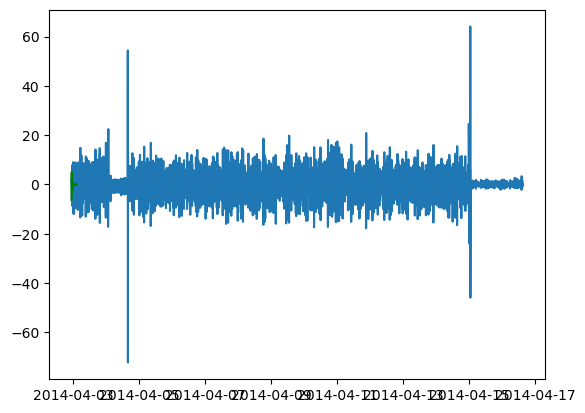

In [68]:
import matplotlib.pyplot as plt

plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

## ARIMA MODEL

In [70]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [71]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [72]:
## evaluate the model
print(model_arima_fit.aic)

657.4208510341685


In [73]:
## predicting the output of sample points
# predictions = model_arima_fit.forecast(steps=9)
prediction=model_arima_fit.predict(start=100,end=142)

In [74]:
prediction

2014-04-02 22:59:00    4.282937
2014-04-02 23:04:00    1.758884
2014-04-02 23:09:00    3.719785
2014-04-02 23:14:00    2.196388
2014-04-02 23:19:00    3.379894
2014-04-02 23:24:00    2.460445
2014-04-02 23:29:00    3.174752
2014-04-02 23:34:00    2.619817
2014-04-02 23:39:00    3.050938
2014-04-02 23:44:00    2.716006
2014-04-02 23:49:00    2.976210
2014-04-02 23:54:00    2.774061
2014-04-02 23:59:00    2.931108
2014-04-03 00:04:00    2.809101
2014-04-03 00:09:00    2.903886
2014-04-03 00:14:00    2.830249
2014-04-03 00:19:00    2.887457
2014-04-03 00:24:00    2.843012
2014-04-03 00:29:00    2.877540
2014-04-03 00:34:00    2.850716
2014-04-03 00:39:00    2.871556
2014-04-03 00:44:00    2.855366
2014-04-03 00:49:00    2.867943
2014-04-03 00:54:00    2.858172
2014-04-03 00:59:00    2.865763
2014-04-03 01:04:00    2.859866
2014-04-03 01:09:00    2.864447
2014-04-03 01:14:00    2.860888
2014-04-03 01:19:00    2.863653
2014-04-03 01:24:00    2.861505
2014-04-03 01:29:00    2.863174
2014-04-

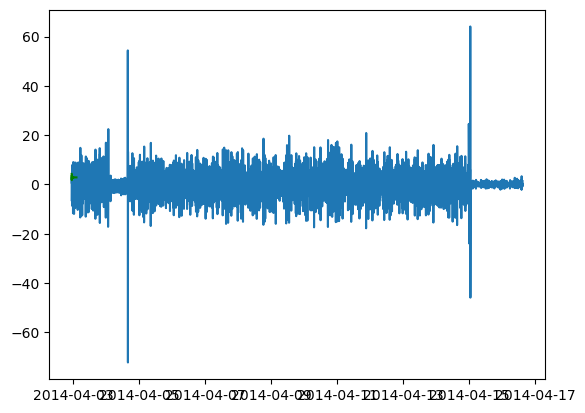

In [75]:
import matplotlib.pyplot as plt

plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [76]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [153]:
#The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)

(0, 0, 0) 632.6184100777523
(0, 0, 1) 522.2872421592008
(0, 0, 2) 440.57617763340386
(0, 0, 3) 433.9713999825762
(0, 0, 4) 435.84477059375956
(0, 1, 0) 747.8452216430456
(0, 1, 1) 631.9323797568495
(0, 1, 2) 526.822488324029
(0, 1, 3) 451.7976299240967
(0, 1, 4) 446.9466777557235
(0, 2, 0) 865.410469246634
(0, 2, 1) 747.9076140572859
(0, 2, 2) 636.9449278789274
(0, 2, 3) 536.6836843658887
(0, 2, 4) 469.3464282917947
(0, 3, 0) 982.1329130947735
(0, 3, 1) 864.176915331771
(0, 3, 2) 751.588197168744
(0, 3, 3) 645.1606741896078
(0, 3, 4) 550.6252572844706
(0, 4, 0) 1097.7381455120562
(0, 4, 1) 979.5435746660448
(0, 4, 2) 866.4955569193329
(0, 4, 3) 758.3245477689571
(0, 4, 4) 656.1286817520238
(1, 0, 0) 560.2210953409024
(1, 0, 1) 476.92636673237524
(1, 0, 2) 433.83561854001505
(1, 0, 3) 435.56167085308243
(1, 0, 4) 437.7422900947773
(1, 1, 0) 657.4208510341685
(1, 1, 1) 561.3621959434466
(1, 1, 2) 483.4469595775882
(1, 1, 3) 446.89066308248766
(1, 1, 4) 455.7741208913085
(1, 2, 0) 761.382

In [78]:
min(list2)  # lowest aic score

18.0

In [80]:
loc=list2.index(min(list2))
loc

119

In [92]:
# pdq corresponding to lowest aic
list1[loc]

(4, 3, 4)

In [97]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [99]:
print(model_arima_fit.aic) # confirm aic score

458.421330019218


In [101]:
forecast = model_arima_fit.forecast(steps=9)
forecast

2014-04-02 22:59:00   -7.773811
2014-04-02 23:04:00    5.559924
2014-04-02 23:09:00   -0.024489
2014-04-02 23:14:00   -2.885410
2014-04-02 23:19:00    1.801188
2014-04-02 23:24:00    0.791249
2014-04-02 23:29:00   -2.068036
2014-04-02 23:34:00    1.319430
2014-04-02 23:39:00    0.263436
Freq: 5min, Name: predicted_mean, dtype: float64

In [103]:
prediction=model_arima_fit.predict(start=1,end=142)

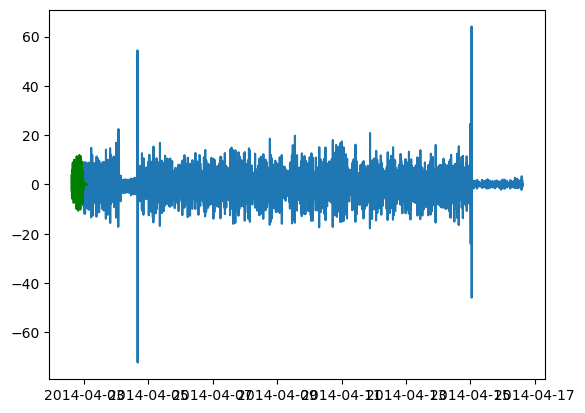

In [105]:
plt.plot(test)
plt.plot(prediction,color='green')

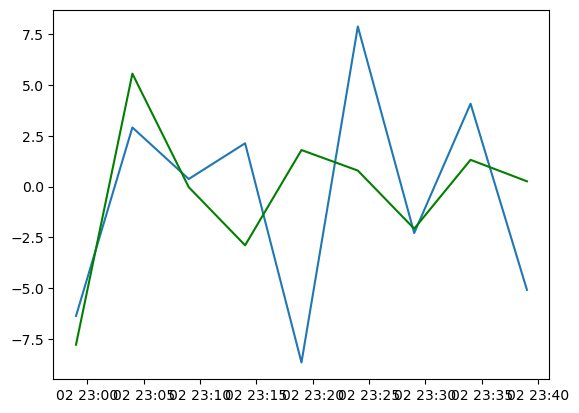

In [155]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

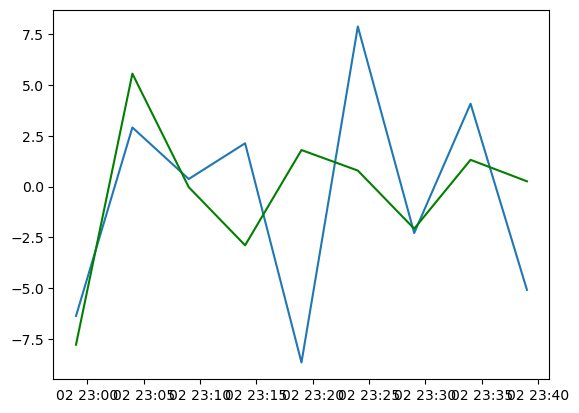

In [109]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [157]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([ -6.362,   2.912,   0.376,   2.134,  -8.65 ,   7.88 ,  -2.282,
         4.082,  -5.076,  -0.084,   0.344,   6.686, -11.704,   9.028,
         1.67 , -11.216,   7.082,   0.96 ,  -2.592,  -0.284,   7.376,
       -11.95 ,   8.894,  -0.914,  -3.216])

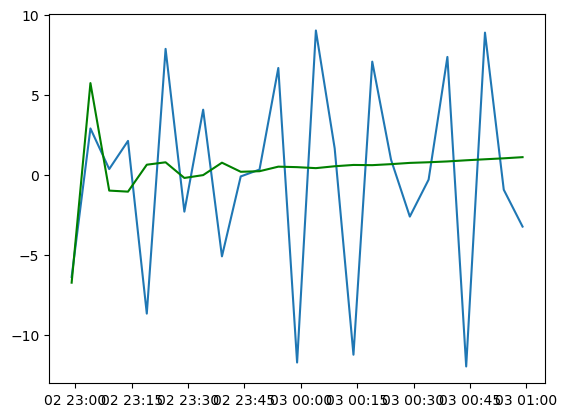

In [159]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [161]:
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': 38.47965391673199,
 'mae': 4.8483364901695705,
 'rmse': 6.203197072214617}

In [163]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))
  
# Calculate mean squared error
mean_squared_error(test1, forecast25)

6.203197072214617


38.47965391673199

# Conclusion